# Wiener Filter
在数学上，我们可以把退化过程分成两部分，一个是退化函数，一个是加性噪声，所以，在频域退化模型如下：\begin{equation*}\label{eq:}
    \mathbf{G}(u,v) = \mathbf{H}(u,v)\mathbf{F}(u,v) + \mathbf{N}(u,v)
\end{equation*}
有约束恢复考虑选取一个线性操作符$\mathbf{Q}$使得$\Vert \mathbf{Q}f_e\Vert$最小，用拉格朗日乘数法解决。设$l$为拉格朗日乘数，最小化下列准则函数：
\begin{equation*}\label{eq:2}
    L(f_e) = \Vert Qf_e\Vert^2+l(\Vert g-Hf_e\Vert^2-\Vert n\Vert^2)
\end{equation*}
在频率域
\begin{equation*}\label{eq:3}
    \mathbf{F}_e (u,v) = \frac{H^\ast(u,v)}{|H(u,v)|^2+K}G(u,v)
\end{equation*}

其中$K$是一个预先设定的常数



In [38]:
# Author： Zhijie Tan
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from PIL import Image
from pylab import *
from matplotlib.font_manager import FontProperties
import numpy as np
matplotlib.rcParams['font.sans-serif']=['Consolas-with-Yahei']

In [53]:
# my fft
from numpy.fft import fft, ifft, fft2, ifft2, fftshift, ifftshift

def mfft(f):
    f = np.array(f)
    F = np.zeros(np.shape(f))
    if np.size(f, 0) == 1 or np.size(f, 1) == 1:
        F = fftshift(fft(ifftshift(f)))
    else:
        F = fftshift(fft2(ifftshift(f)))
    return F

# 快速逆傅里叶变换，调整0频
def mifft(f):
    f = np.array(f)
    F = np.zeros(np.shape(f))
    if np.size(f, 0) == 1 or np.size(f, 1) == 1:
        F = fftshift(ifft(ifftshift(f)))
    else:
        F = fftshift(ifft2(ifftshift(f)))
    return F

In [124]:
# 读取图像
I = Image.open("cameraman.tif")
Im = np.array(I)
Ny, Nx = np.shape(Im)
x = np.linspace(-Nx/2, Nx/2-1, Nx)
y = np.linspace(-Ny/2, Ny/2-1, Ny)
X, Y = np.meshgrid(x, y)
h = np.exp(-np.sqrt((X**2+Y**2)/10))
H = mfft(h) # 频域退化函数
noise = np.random.normal(0, np.sqrt(16), (Ny, Nx)) # 加高斯噪声
Im_noise = np.abs(mifft(np.multiply(mfft(Im),H)))+noise

# 维纳滤波
G = mfft(Im_noise)
K = 0.1
Fe = np.abs(mifft(np.multiply(np.conj(H),G)/(np.abs(H)**2+K)))
FeN = np.abs(mifft(np.multiply(np.conj(H),G)/(np.abs(H)**2)))

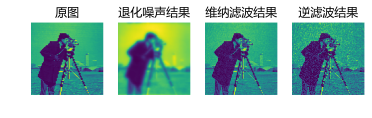

In [125]:
figure
subplot(141)
imshow(Im)
title("原图")
axis("off")
subplot(142)
imshow(Im_noise)
title("退化噪声结果")
axis('off')
subplot(143)
imshow(Fe)
title("维纳滤波结果")
axis('off')
subplot(144)
imshow(FeN)
title("逆滤波结果")
axis('off')
show()

### 写在最后
当$K=0$的时候，维纳滤波就变成了逆滤波，逆滤波对存在噪声的时候处理效果较差
$K$表示的噪声强度与信号强度的比值